# 1. Business Understanding
YouTube serves as a prominent platform for content consumption and interaction, fostering a rich
ecosystem of discussions through comments. Understanding the sentiment of comments towards specific
entities, such as video content or creators, is crucial for gauging audience reception and shaping content
strategies effectively. Utilizing natural language processing (NLP) techniques, this project aims to analyze
YouTube comments to discern sentiment towards targeted entities.

### Objective:
The objective of this internship project is to perform entity-level sentiment analysis on YouTube
comments using provided training and validation datasets. Given a comment and a specified entity (e.g.,
video ID or creator name), the task is to classify the sentiment of the comment as Positive, Negative, or
Neutral, with messages irrelevant to the entity also categorized as Neutral.



# 2. Data Understanding 
Data Description:
- Tweet ID: A unique identifier for each comment tweet.
- Borderlands: The entity of interest associated with the comment (e.g., video ID, creator name).
- Sentiment: The sentiment label assigned to the comment regarding the specified entity. Three classes
are present: Positive, Negative, Neutral. Messages irrelevant to the entity are categorized as Neutral.
- Tweet Content: The textual content of the comment tweet.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

c:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2.1 Exploratory Data Analysis 

In [2]:

# Load training data
train_data = pd.read_csv("twitter_training.csv")

# Load validation data
validation_data = pd.read_csv("twitter_validation.csv")

print("Train data:", train_data.shape)
print("Validation data:", validation_data.shape)

Train data: (74681, 4)
Validation data: (999, 4)


In [3]:
display(train_data.head())
train_data.info()
train_data.describe()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [4]:
display(validation_data.head())
validation_data.info()
validation_data.describe()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

,3364
count,999.000000
mean,6435.159159
std,3728.912226
min,6.000000
25%,3241.500000
50%,6560.000000
75%,9662.500000
max,13197.000000


In [5]:
# Add the new column names on top
new_columns = ['Tweet ID', 'Borderlands', 'Sentiment', 'Tweet']
train_data.columns = new_columns

print(train_data)

       Tweet ID  Borderlands Sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74676      9200       Nvidia  Positive   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   

                                                   Tweet  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized th

In [6]:
# Add the new column names on top
new_columns = ['Tweet ID', 'Borderlands', 'Sentiment', 'Tweet']
validation_data.columns = new_columns

print(validation_data)

     Tweet ID          Borderlands   Sentiment  \
0         352               Amazon     Neutral   
1        8312            Microsoft    Negative   
2        4371                CS-GO    Negative   
3        4433               Google     Neutral   
4        6273                 FIFA    Negative   
..        ...                  ...         ...   
994      4891  GrandTheftAuto(GTA)  Irrelevant   
995      4359                CS-GO  Irrelevant   
996      2652          Borderlands    Positive   
997      8069            Microsoft    Positive   
998      6960      johnson&johnson     Neutral   

                                                 Tweet  
0    BBC News - Amazon boss Jeff Bezos rejects clai...  
1    @Microsoft Why do I pay for WORD when it funct...  
2    CSGO matchmaking is so full of closet hacking,...  
3    Now the President is slapping Americans in the...  
4    Hi @EAHelp I’ve had Madeleine McCann in my cel...  
..                                                 ...  


In [7]:

# Training data
train_positive = train_data[train_data['Sentiment'] == 'Positive'].shape[0]
train_negative = train_data[train_data['Sentiment'] == 'Negative'].shape[0]
train_neutral = train_data[train_data['Sentiment'] == 'Neutral'].shape[0]

print("Training Data:")
print("Positive:", train_positive)
print("Negative:", train_negative)
print("Neutral:", train_neutral)

# Validation data
val_positive = validation_data[validation_data['Sentiment'] == 'Positive'].shape[0]
val_negative = validation_data[validation_data['Sentiment'] == 'Negative'].shape[0]
val_neutral = validation_data[validation_data['Sentiment'] == 'Neutral'].shape[0]

print("\nValidation Data:")
print("Positive:", val_positive)
print("Negative:", val_negative)
print("Neutral:", val_neutral)


Training Data:
Positive: 20831
Negative: 22542
Neutral: 18318

Validation Data:
Positive: 277
Negative: 266
Neutral: 285


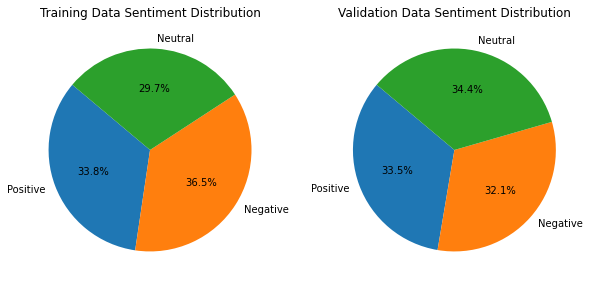

In [8]:

# Data
train_sentiments = [train_positive, train_negative, train_neutral]
val_sentiments = [val_positive, val_negative, val_neutral]
labels = ['Positive', 'Negative', 'Neutral']

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Training data
axes[0].pie(train_sentiments, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Training Data Sentiment Distribution')

# Validation data
axes[1].pie(val_sentiments, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Validation Data Sentiment Distribution')

plt.show()


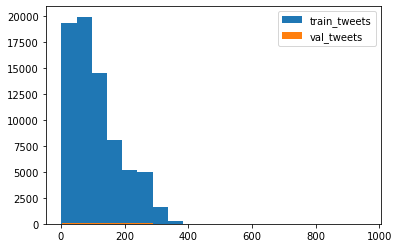

In [9]:
length_train = train_data['Tweet'].str.len()
length_val = validation_data['Tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_val, bins=20, label="val_tweets")
plt.legend()
plt.show()

In [10]:
train_data.drop_duplicates(inplace=True)
print("Train data:", train_data.shape)


Train data: (71981, 4)


In [11]:
validation_data.drop_duplicates(inplace=True)
print("Validation data:", validation_data.shape)


Validation data: (999, 4)


In [12]:
# adding a column to represent the length of the tweet

train_data['len'] = train_data['Tweet'].str.len()
train_data.head(10)


,Tweet ID,Borderlands,Sentiment,Tweet,len
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51.0
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50.0
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51.0
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57.0
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53.0
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,286.0
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,293.0
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,139.0
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...,283.0
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...,288.0


In [13]:
validation_data['len'] = validation_data['Tweet'].str.len()
validation_data.head()

,Tweet ID,Borderlands,Sentiment,Tweet,len
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,109
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,91
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",71
3,4433,Google,Neutral,Now the President is slapping Americans in the...,170
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,268


In [14]:
train_data.Borderlands.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [15]:
validation_data.Borderlands.unique()

array(['Amazon', 'Microsoft', 'CS-GO', 'Google', 'FIFA', 'MaddenNFL',
       'TomClancysRainbowSix', 'AssassinsCreed', 'CallOfDuty', 'Dota2',
       'Verizon', 'NBA2K', 'Nvidia', 'GrandTheftAuto(GTA)',
       'RedDeadRedemption(RDR)', 'Hearthstone', 'ApexLegends',
       'Overwatch', 'PlayerUnknownsBattlegrounds(PUBG)', 'Borderlands',
       'PlayStation5(PS5)', 'johnson&johnson', 'Fortnite',
       'Xbox(Xseries)', 'CallOfDutyBlackopsColdWar', 'Facebook',
       'HomeDepot', 'Cyberpunk2077', 'TomClancysGhostRecon',
       'WorldOfCraft', 'LeagueOfLegends', 'Battlefield'], dtype=object)

### 2.2 Data Preprocessing

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer  


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_text(text):
    # Check if the text is NaN
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, punctuation, and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:

# Apply the preprocessing function to the text
train_data['preprocessed_text'] = train_data['Tweet'].apply(preprocess_text)

# Display the preprocessed text
train_data.head()   



,Tweet ID,Borderlands,Sentiment,Tweet,len,preprocessed_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51.0,coming border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50.0,im getting borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51.0,im coming borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57.0,im getting borderland murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53.0,im getting borderland murder


In [18]:
# Apply the preprocessing function to the text
validation_data['preprocessed_text'] = validation_data['Tweet'].apply(preprocess_text)

# Display the preprocessed text
validation_data.head()   

,Tweet ID,Borderlands,Sentiment,Tweet,len,preprocessed_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,109,bbc news amazon bos jeff bezos reject claim co...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,91,microsoft pay word function poorly samsungus c...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",71,csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,170,president slapping american face really commit...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,268,hi eahelp ive madeleine mccann cellar past yea...


# 3. Feature Extraction 


Bag-of-Words Feautures 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
# Bag-of-Words (BoW) feature extraction on the train set
bow_vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # Initialize CountVectorizer
train_bow = bow_vectorizer.fit_transform(train_data['preprocessed_text'])  # Fit and transform the preprocessed texts
print("Train Bag-of-Words (BoW) features:")
train_bow.shape

Train Bag-of-Words (BoW) features:


(71981, 25048)

In [21]:
# Bag-of-Words (BoW) feature extraction on the validation dataset
bow_vectorizer = CountVectorizer(max_features=5000, max_df=0.95, min_df=2)  # Initialize CountVectorizer
val_bow = bow_vectorizer.fit_transform(validation_data['preprocessed_text'])  # Fit and transform the preprocessed texts
print("Validation Bag-of-Words (BoW) features:")
val_bow.shape

Validation Bag-of-Words (BoW) features:


(999, 1422)

In [22]:
# TF-IDF feature extraction on the train set 
tfidf_vectorizer = TfidfVectorizer( max_df=0.95, min_df=2)  # Initialize TfidfVectorizer
train_tfidf = tfidf_vectorizer.fit_transform(train_data['preprocessed_text'])  # Fit and transform the preprocessed texts
print("\nTrain TF-IDF features:")
train_tfidf.shape 


Train TF-IDF features:


(71981, 25048)

In [23]:
# TF-IDF feature extraction on the train set 
tfidf_vectorizer = TfidfVectorizer()  # Initialize TfidfVectorizer
val_tfidf = tfidf_vectorizer.fit_transform(validation_data['preprocessed_text'])  # Fit and transform the preprocessed texts
print("\nValidation TF-IDF features:")
val_tfidf.shape


Validation TF-IDF features:


(999, 4799)

Word2Vec Embeddings

In [24]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [40]:
# Tokenize the preprocessed text data
tokenized_texts = [word_tokenize(text.lower()) for text in train_data['preprocessed_text']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Get word embeddings
train_w2v= word2vec_model.wv
print(len(train_w2v))
print("Train Word embeddings for 'tweet':", train_w2v['tweet'])







35627
Train Word embeddings for 'tweet': [-0.23515667  0.397098    0.6442307   0.5693868   0.383001    0.16850568
  0.94083333  0.40596876 -0.30690378  0.1080312  -0.2795235  -0.98399556
  0.14014094 -0.41551146  0.78242403 -0.6173317   0.5144813  -0.6585553
 -0.51576406 -0.5507543  -0.43280944  0.63520426  0.22191516  0.12445121
 -0.16329606 -0.70125407 -0.3267698  -0.02538605 -0.7420035  -0.34296
  0.66204053 -0.32972994  0.9793449  -0.34864303 -0.5596255   0.84579885
  0.11930018 -0.14298987 -0.19143835  0.09830177  0.3658382  -0.6822731
  0.3314501   0.52667075  0.12857394  0.03571326 -0.40726742 -0.75968254
 -0.4877504   0.8174068  -0.3406381  -0.37748104  0.1675563   0.04042452
 -0.0070559  -0.3271534   0.5224954   0.6440578  -0.8716538   0.6701783
 -0.3962375  -0.02376523 -0.13073781 -0.8522655  -1.333975    0.05855082
  0.02285606  0.04536531 -0.8407022   0.29501852 -0.18444884 -0.5635555
  0.18276565 -0.47951308  0.82562613  0.19485916 -0.37162086  0.2829828
 -0.5763723  -0.07

In [26]:
# Tokenize the preprocessed text data
tokenized_texts = [word_tokenize(text.lower()) for text in validation_data['preprocessed_text']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Get word embeddings
val_w2v = word2vec_model.wv
print(len(val_w2v))
print("Word embeddings for 'tweet':", val_w2v['tweet'])

4816
Word embeddings for 'tweet': [-0.00581342 -0.0081362  -0.00628567 -0.00214547 -0.00315375  0.00530076
  0.00363614  0.0072567  -0.00153495 -0.00462205 -0.00107539  0.00030312
 -0.00287792  0.00902635  0.00712004  0.00048607  0.00859375 -0.00242114
  0.00994031 -0.0047803  -0.00783538  0.00217044  0.00675738  0.00665181
  0.00024586 -0.00655487  0.00349301  0.00141204 -0.00021786 -0.00579476
  0.00407382 -0.00338867 -0.00921674 -0.0041651   0.00980438 -0.00041123
  0.00563448  0.00143547 -0.00781784  0.00456445  0.00517496 -0.00118051
  0.00285341  0.00269325 -0.00223783  0.00678701  0.0029334   0.00285942
  0.00703172 -0.00862836  0.0090529  -0.00534342 -0.0022978   0.00663186
  0.00871231 -0.00758732  0.00912465  0.00902642 -0.00099831 -0.00055613
 -0.00217653 -0.00265823 -0.00699022  0.0069117   0.00094725 -0.00335145
  0.00709577  0.00686456  0.00260444 -0.00312821 -0.00530437 -0.00219334
  0.0089104   0.00197941 -0.00037924  0.00065403 -0.00273843 -0.00475612
  0.0076498  -0.0

# 4. Model Building
We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

1. Logistic Regression
2. Support Vector Machine
3. RandomForest
4. XGBoost

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

In [28]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_bow, train_data['Sentiment'], test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(53985, 25048)
(17996, 25048)
(53985,)
(17996,)


In [29]:
# # standardization

# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)
# x_valid = sc.transform(x_valid)


1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report

Bag-Of-Words Features

In [31]:

# splitting data into training and test set
xtrain_bow, xtest_bow, ytrain, ytest = train_test_split(train_bow, train_data['Sentiment'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [32]:
lreg = LogisticRegression(max_iter=1000)
lreg.fit(xtrain_bow, ytrain) # training the model

# Predictions
lr_preds = lreg.predict(xtest_bow)

In [33]:
# EvaluateAccuracy
lr_accuracy = accuracy_score(ytest, lr_preds)
print("Logistic Regression Accuracy:", lr_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(ytest, lr_preds))

# # F1 Score
# lr_f1_score = f1_score(ytest, lr_preds, average='weighted')  # Use 'weighted' to account for class imbalance
# print("\nF1 Score (weighted):", lr_f1_score)

Logistic Regression Accuracy: 0.7989349386432044

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.85      0.71      0.77      3788
    Negative       0.82      0.84      0.83      6471
     Neutral       0.82      0.75      0.79      5347
    Positive       0.74      0.85      0.79      5989

    accuracy                           0.80     21595
   macro avg       0.81      0.79      0.80     21595
weighted avg       0.80      0.80      0.80     21595



Next is to make predictions for the validation dataset

TF-IDF Extraction

In [34]:
# splitting data into training and test set
xtrain_tfidf, xtest_tfidf, ytrain, ytest = train_test_split(train_tfidf, train_data['Sentiment'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [36]:

lreg.fit(xtrain_tfidf, ytrain) # training the model

# Predictions
lr_preds = lreg.predict(xtest_tfidf)

# EvaluateAccuracy
lr_accuracy = accuracy_score(ytest, lr_preds)
print("Logistic Regression Accuracy:", lr_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(ytest, lr_preds))

Logistic Regression Accuracy: 0.7537392915026626

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.80      0.63      0.71      3788
    Negative       0.77      0.82      0.79      6471
     Neutral       0.71      0.73      0.72      5347
    Positive       0.75      0.77      0.76      5989

    accuracy                           0.75     21595
   macro avg       0.76      0.74      0.75     21595
weighted avg       0.76      0.75      0.75     21595



Word2Vec

In [41]:
# Function to compute the average word2vec for each tweet
def compute_avg_w2v(text, model):
    vectors = [model[word] for word in text if word in model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Compute average word2vec for each tweet
tweet_embeddings = np.array([compute_avg_w2v(text, train_w2v) for text in tokenized_texts])

# Ensure the embeddings have the same number of samples as the sentiment labels
assert tweet_embeddings.shape[0] == len(train_data['Sentiment']), \
    f"Embeddings count {tweet_embeddings.shape[0]} does not match sentiment labels count {len(train_data['Sentiment'])}"

# Splitting data into training and test set
xtrain_w2v, xtest_w2v, ytrain, ytest = train_test_split(tweet_embeddings, train_data['Sentiment'],  
                                                        random_state=42, 
                                                        test_size=0.3)


print("Training data shape:", xtrain_w2v.shape)
print("Test data shape:", xtest_w2v.shape)


Training data shape: (50386, 100)
Test data shape: (21595, 100)


In [43]:

lreg.fit(xtrain_w2v, ytrain) # training the model

# Predictions
lr_preds = lreg.predict(xtest_w2v)

# EvaluateAccuracy
lr_accuracy = accuracy_score(ytest, lr_preds)
print("Logistic Regression Accuracy:", lr_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(ytest, lr_preds))

Logistic Regression Accuracy: 0.5164621440148183

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.46      0.16      0.23      3788
    Negative       0.55      0.67      0.61      6471
     Neutral       0.46      0.52      0.49      5347
    Positive       0.53      0.57      0.55      5989

    accuracy                           0.52     21595
   macro avg       0.50      0.48      0.47     21595
weighted avg       0.51      0.52      0.50     21595



Random Forest 

Bag-Of-Words 

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=400, random_state=11)
rf.fit(xtrain_bow, ytrain)

# Make predictions on the test set
rf_preds = rf.predict(xtest_bow)

# Evaluate Accuracy
rf_accuracy = accuracy_score(ytest, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(ytest, rf_preds))

# F1 Score
rf_f1_score = f1_score(ytest, rf_preds, average='weighted')  # Use 'weighted' to account for class imbalance
print("\nF1 Score (weighted):", rf_f1_score)

Random Forest Accuracy: 0.8855753646677471

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.95      0.81      0.87      3788
    Negative       0.89      0.92      0.91      6471
     Neutral       0.92      0.85      0.88      5347
    Positive       0.83      0.92      0.87      5989

    accuracy                           0.89     21595
   macro avg       0.90      0.88      0.88     21595
weighted avg       0.89      0.89      0.89     21595


F1 Score (weighted): 0.8855210718557426


In [47]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=400, random_state=11)
rf.fit(xtrain_tfidf, ytrain)

# Make predictions on the test set
rf_pred = rf.predict(xtest_tfidf)

# Evaluate Accuracy
rf_accuracy = accuracy_score(ytest, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(ytest, rf_pred))

# F1 Score
rf_f1_score = f1_score(ytest, rf_pred, average='weighted')  # Use 'weighted' to account for class imbalance
print("\nF1 Score (weighted):", rf_f1_score)

Random Forest Accuracy: 0.8904839083121093

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.81      0.88      3788
    Negative       0.90      0.92      0.91      6471
     Neutral       0.90      0.87      0.89      5347
    Positive       0.83      0.93      0.88      5989

    accuracy                           0.89     21595
   macro avg       0.90      0.88      0.89     21595
weighted avg       0.89      0.89      0.89     21595


F1 Score (weighted): 0.8904720085414694
